In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("AER_credit_card_data.csv")
data

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,yes,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,no,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,yes,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,yes,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


In [3]:
# Vérification des dimensions du dataset
data.shape

(1319, 12)

In [4]:
# vérification des types des colonnes
data.dtypes

card            object
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner           object
selfemp         object
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object

In [5]:
# Verification des valeurs nulles
data.isna().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

In [6]:
# Vérification des valeurs dupliquées
data_duplicated = data.duplicated().value_counts()
data_duplicated

False    1319
dtype: int64

In [7]:
# Vérification des statistiques sommaires des variables numériques
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
reports,1319.0,0.456406,1.345267,0.000000,0.000000,0.000000,0.000000,14.00000
age,1319.0,33.213103,10.142783,0.166667,25.416670,31.250000,39.416670,83.50000
income,1319.0,3.365376,1.693902,0.210000,2.243750,2.900000,4.000000,13.50000
share,1319.0,0.068732,0.094656,0.000109,0.002316,0.038827,0.093617,0.90632
expenditure,1319.0,185.057071,272.218917,0.000000,4.583333,101.298300,249.035800,3099.50500
dependents,1319.0,0.993935,1.247745,0.000000,0.000000,1.000000,2.000000,6.00000
months,1319.0,55.267627,66.271746,0.000000,12.000000,30.000000,72.000000,540.00000
majorcards,1319.0,0.817286,0.386579,0.000000,1.000000,1.000000,1.000000,1.00000
active,1319.0,6.996967,6.305812,0.000000,2.000000,6.000000,11.000000,46.00000


In [8]:
# Vérification des valeurs uniques de la colonne card
data["card"].unique()

array(['yes', 'no'], dtype=object)

In [9]:
# Vérification des valeurs uniques de la colonne owner
data["owner"].unique()



array(['yes', 'no'], dtype=object)

In [10]:

# Vérification des valeurs uniques de la colonne selfemp
data["selfemp"].unique()

array(['no', 'yes'], dtype=object)

In [11]:

# Vérification des valeurs uniques de la colonne majorcards
data["majorcards"].unique()

array([1, 0], dtype=int64)

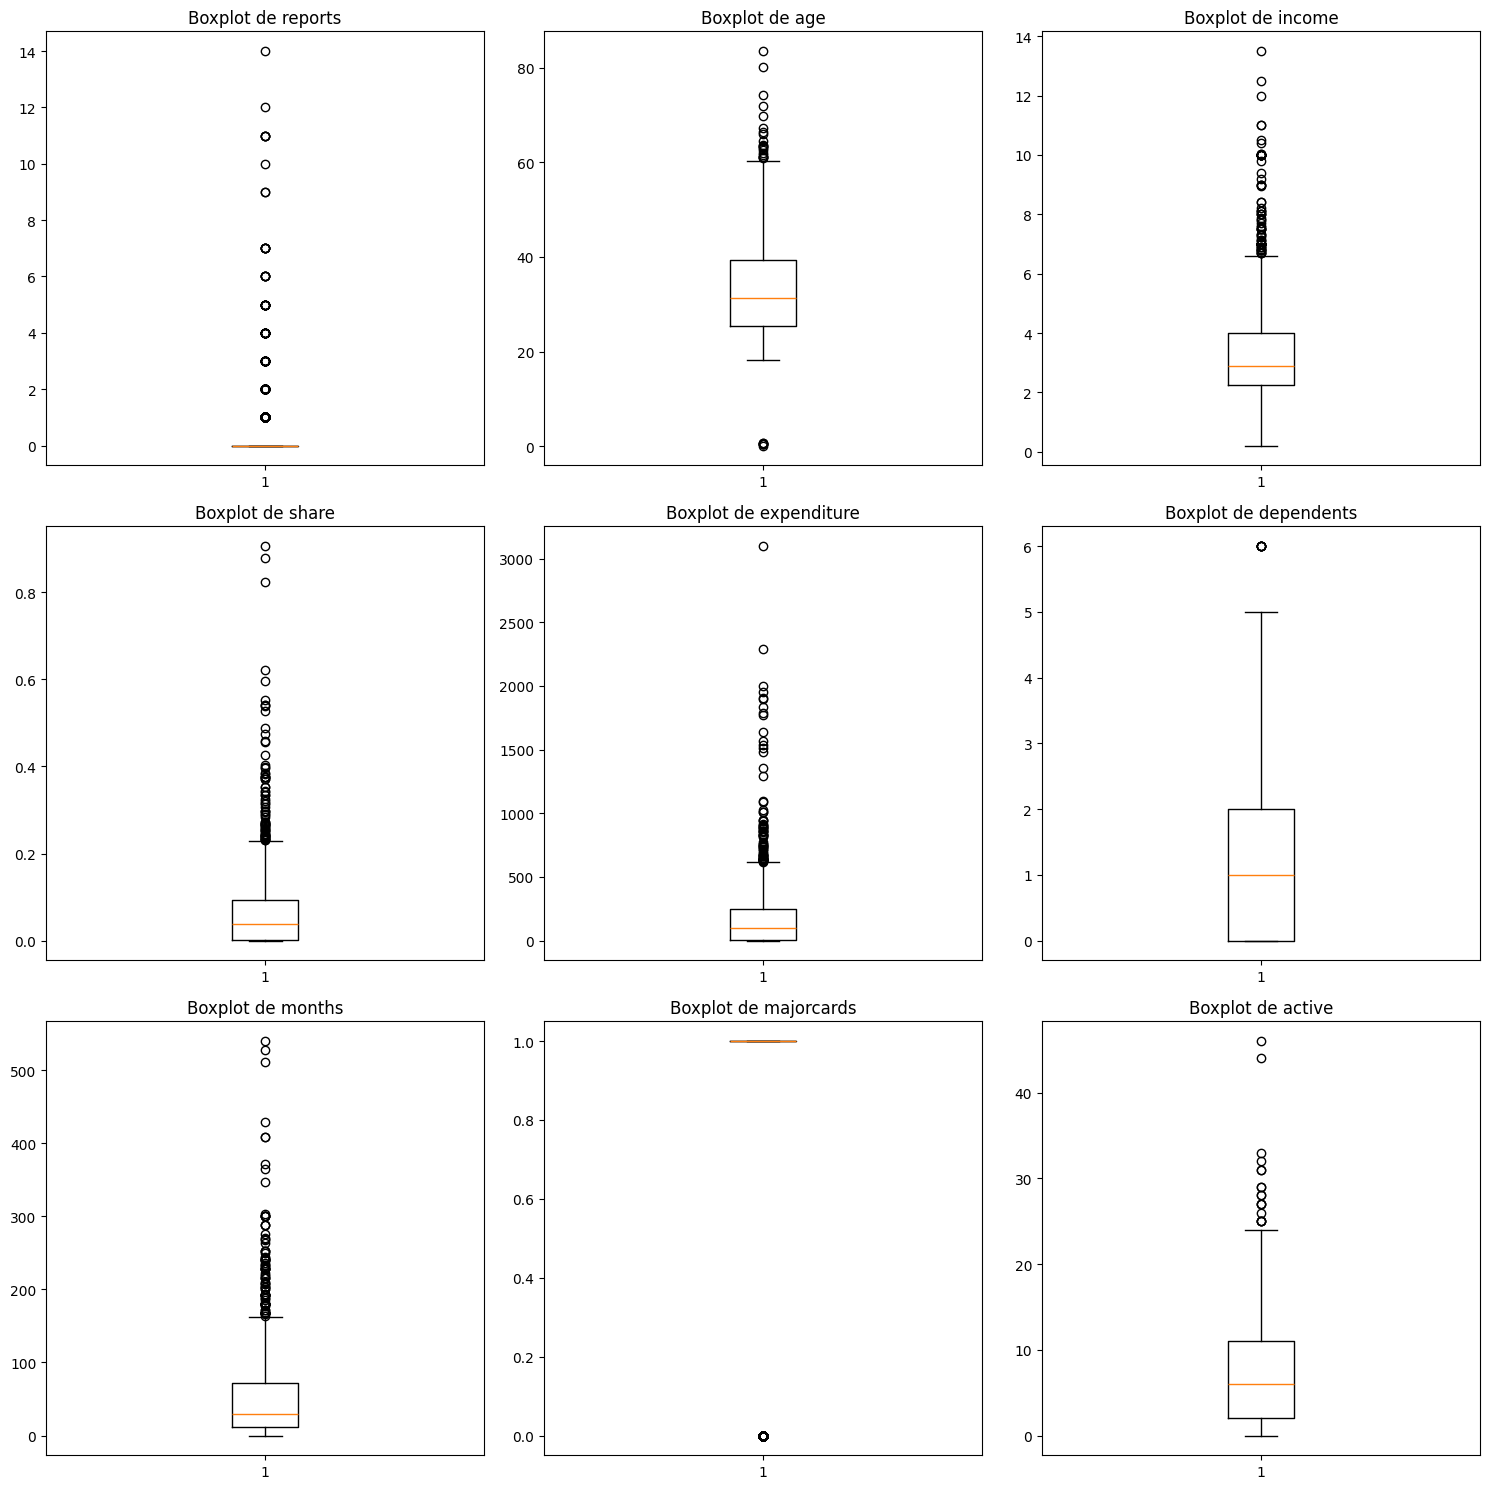

In [12]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

if len(numeric_columns) == 0:
    print("Aucune colonne numérique trouvée.")
else:
    n_cols = 3
    n_rows = (len(numeric_columns) // n_cols) + (1 if len(numeric_columns) % n_cols != 0 else 0)
    # Créer la figure
    plt.figure(figsize=(n_cols * 5, n_rows * 5))

    for i, column in enumerate(numeric_columns):
        if data[column].dropna().empty:
            print(f"La colonne {column} contient uniquement des valeurs manquantes.")
            continue

        plt.subplot(n_rows, n_cols, i + 1)
        plt.boxplot(data[column].dropna())
        plt.title(f'Boxplot de {column}')
        plt.tight_layout()


    plt.show()

In [13]:
def replace_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data.clip(lower=lower_bound, upper=upper_bound)
    return data

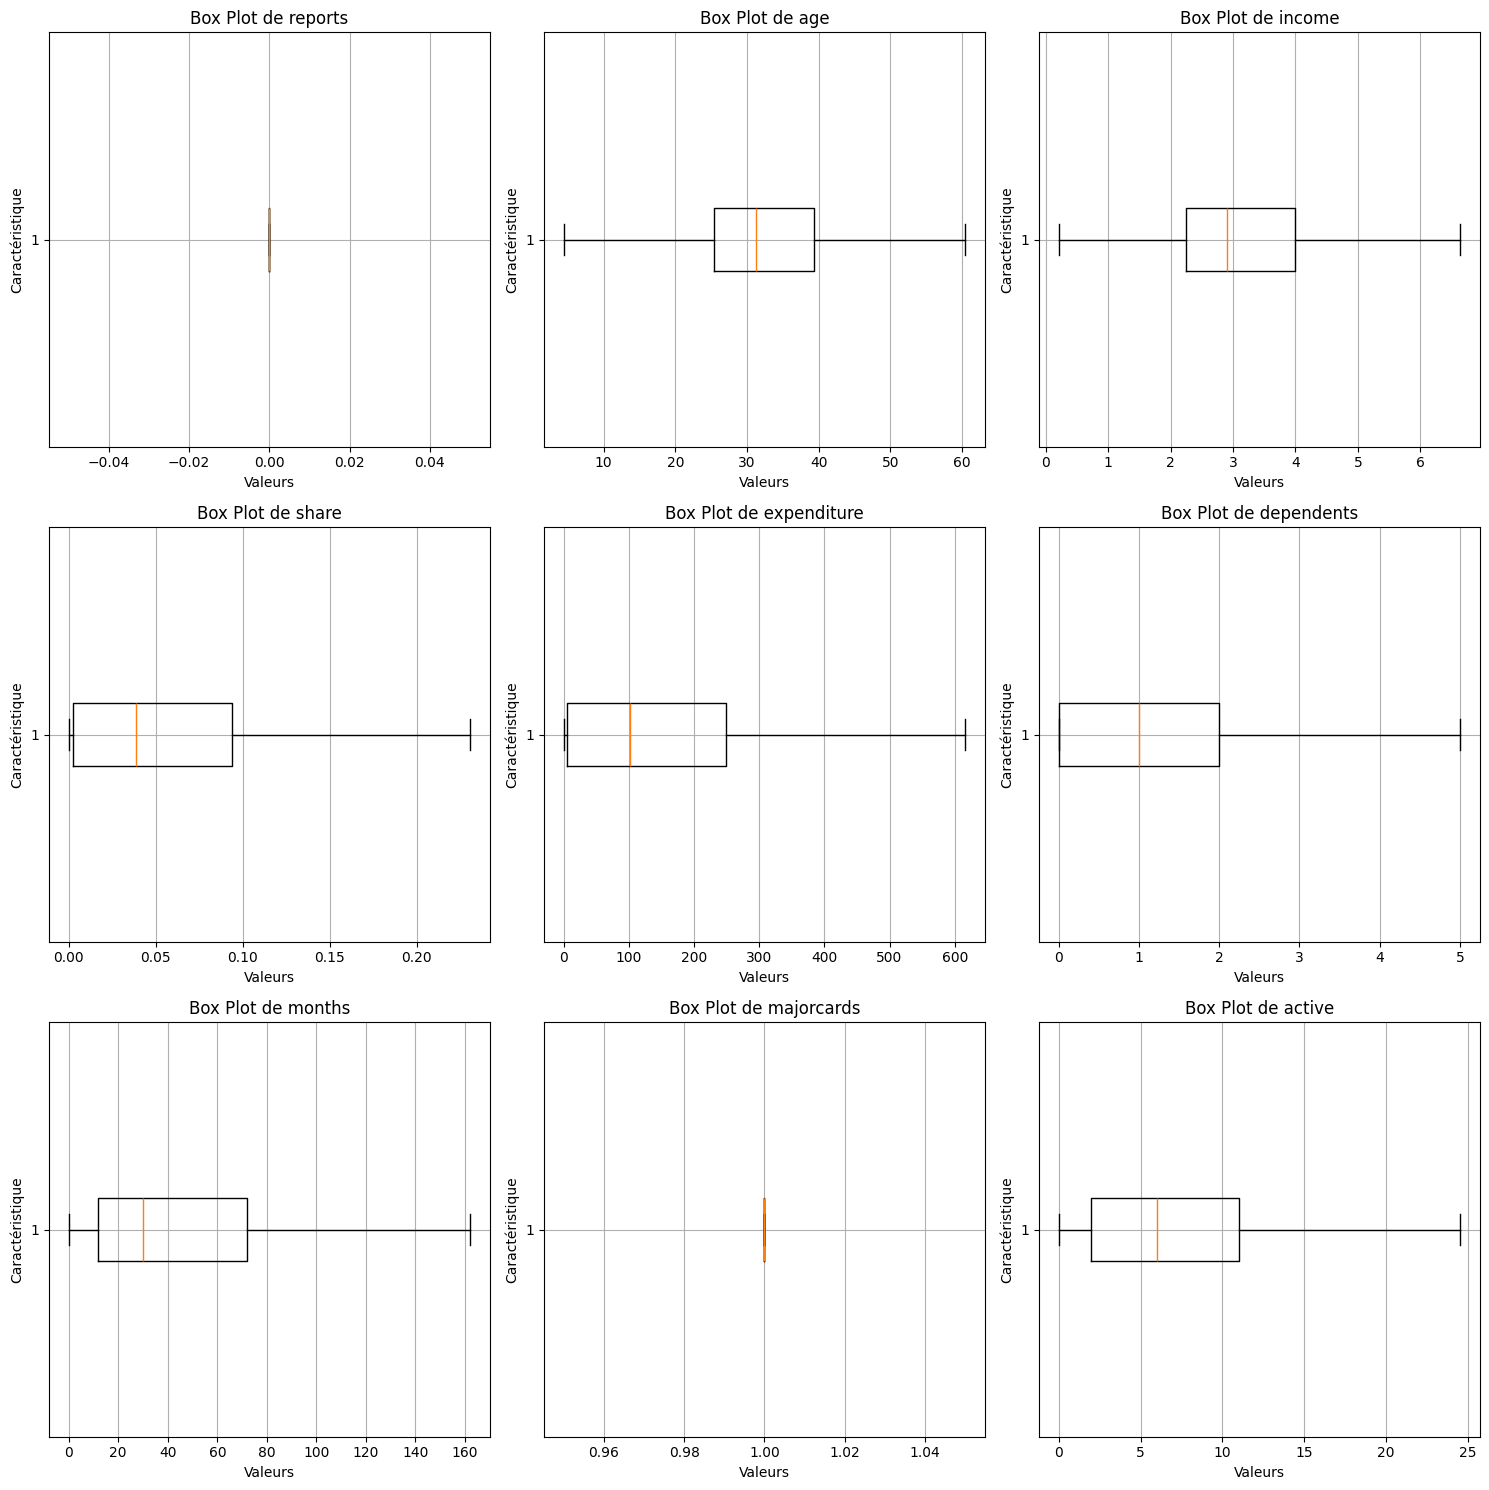

In [14]:
# Sélectionner les colonnes numériques
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Appliquer la correction des outliers sur chaque colonne numérique
for col in numeric_columns.columns:
    data[col] = replace_outliers(data[col])

# Calculer le nombre de lignes et de colonnes pour la grille de subplots
n_cols = 3 
n_rows = (len(numeric_columns.columns) // n_cols) + (1 if len(numeric_columns.columns) % n_cols != 0 else 0)  

# Créer une figure avec un nombre dynamique de subplots
plt.figure(figsize=(n_cols * 5, n_rows * 5))  

# Créer un boxplot pour chaque colonne numérique
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(n_rows, n_cols, i + 1)  
    plt.boxplot(data[col].dropna(), vert=False)  
    plt.title(f'Box Plot de {col}')
    plt.xlabel('Valeurs')
    plt.ylabel('Caractéristique')
    plt.grid(True)

# Afficher tous les boxplots
plt.tight_layout()
plt.show()

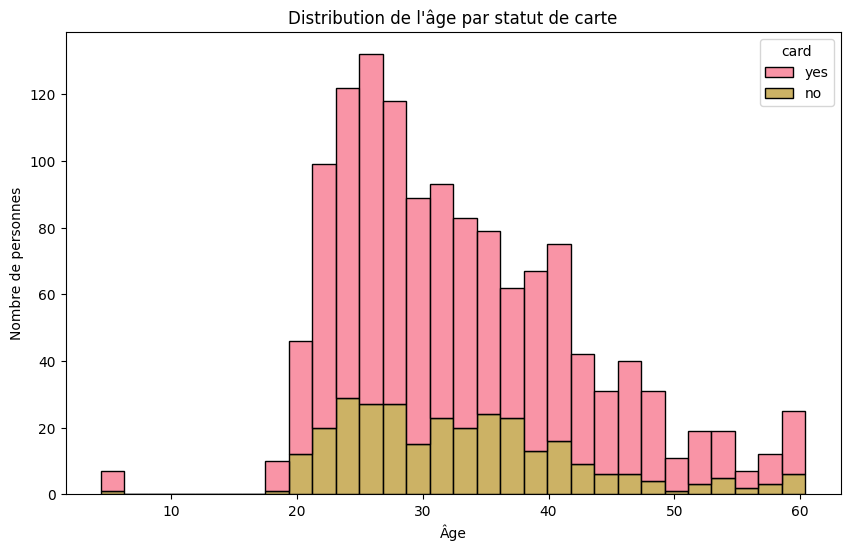

In [15]:
# Configuration du style
sns.set_palette("husl")

# Distribution de l'âge des détenteurs de cartes
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='card', multiple="stack", bins=30)
plt.title('Distribution de l\'âge par statut de carte')
plt.xlabel('Âge')
plt.ylabel('Nombre de personnes')
plt.show()
plt.close()

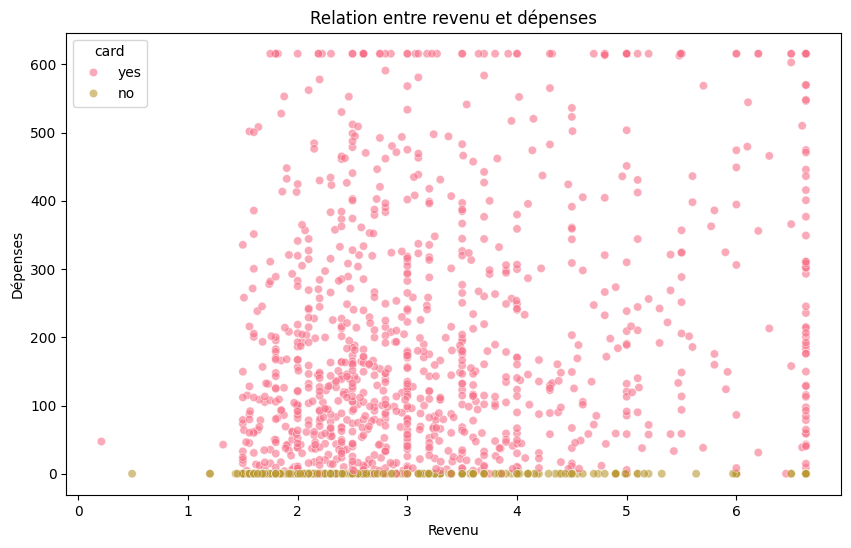

In [16]:
# Relation entre revenu et dépenses
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='income', y='expenditure', hue='card', alpha=0.6)
plt.title('Relation entre revenu et dépenses')
plt.xlabel('Revenu')
plt.ylabel('Dépenses')
plt.show()
plt.close()


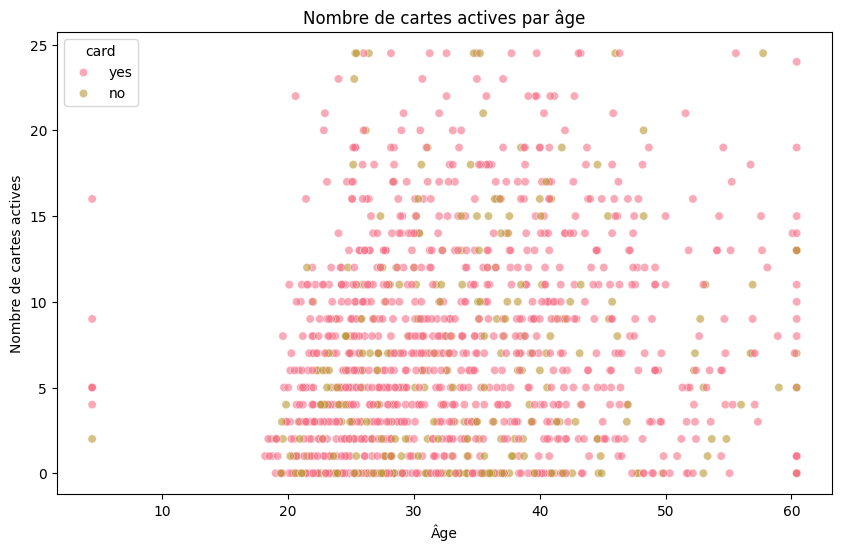

In [17]:
# Nombre de cartes actives par âge
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='active', hue='card', alpha=0.6)
plt.title('Nombre de cartes actives par âge')
plt.xlabel('Âge')
plt.ylabel('Nombre de cartes actives')
plt.show()
plt.close()

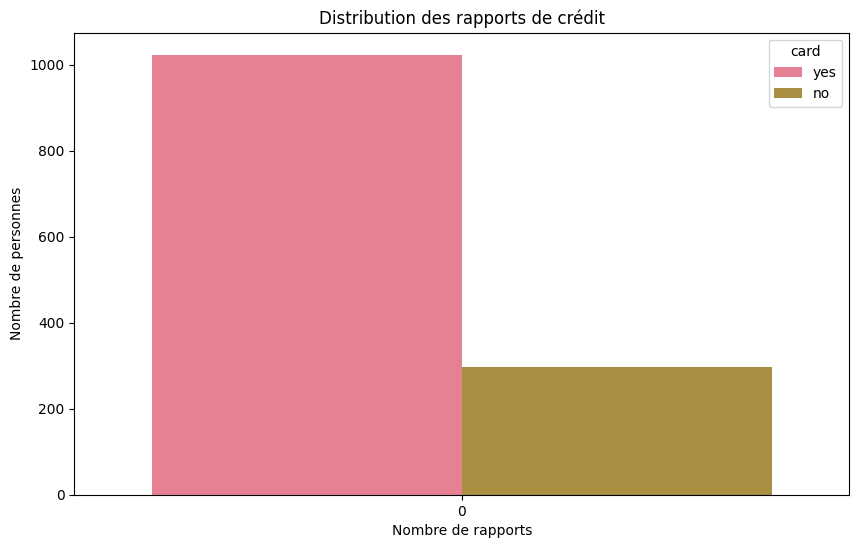

In [18]:
# Distribution des rapports de crédit
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='reports', hue='card')
plt.title('Distribution des rapports de crédit')
plt.xlabel('Nombre de rapports')
plt.ylabel('Nombre de personnes')
plt.show()
plt.close()


C:\Users\ngoue\AppData\Local\Temp\ipykernel_26972\3078260010.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data, x='expenditure', hue='card', common_norm=False)


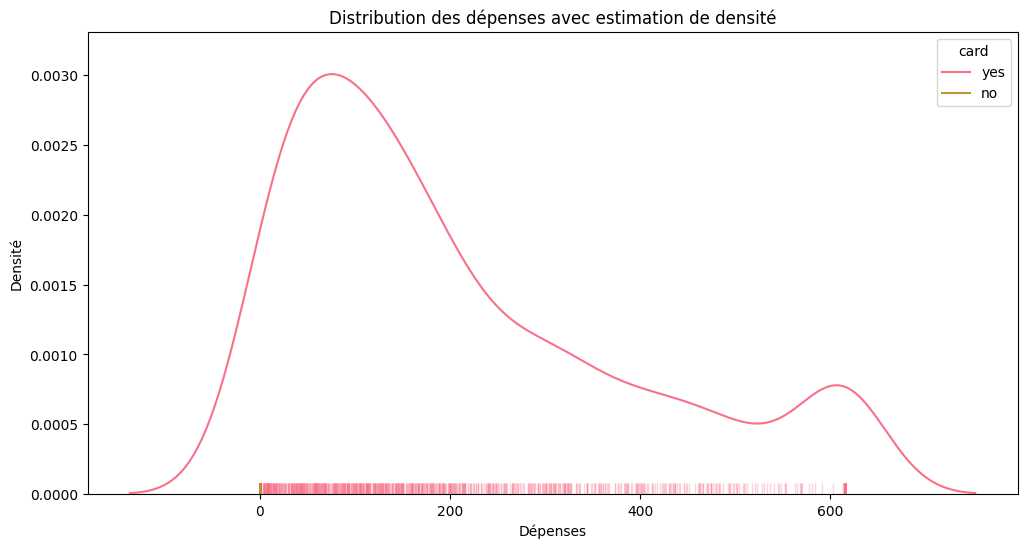

In [19]:
# Analyse de la distribution des dépenses avec KDE et rug plot
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data, x='expenditure', hue='card', common_norm=False)
sns.rugplot(data=data, x='expenditure', hue='card', alpha=0.3)
plt.title('Distribution des dépenses avec estimation de densité')
plt.xlabel('Dépenses')
plt.ylabel('Densité')
plt.show()
plt.close()

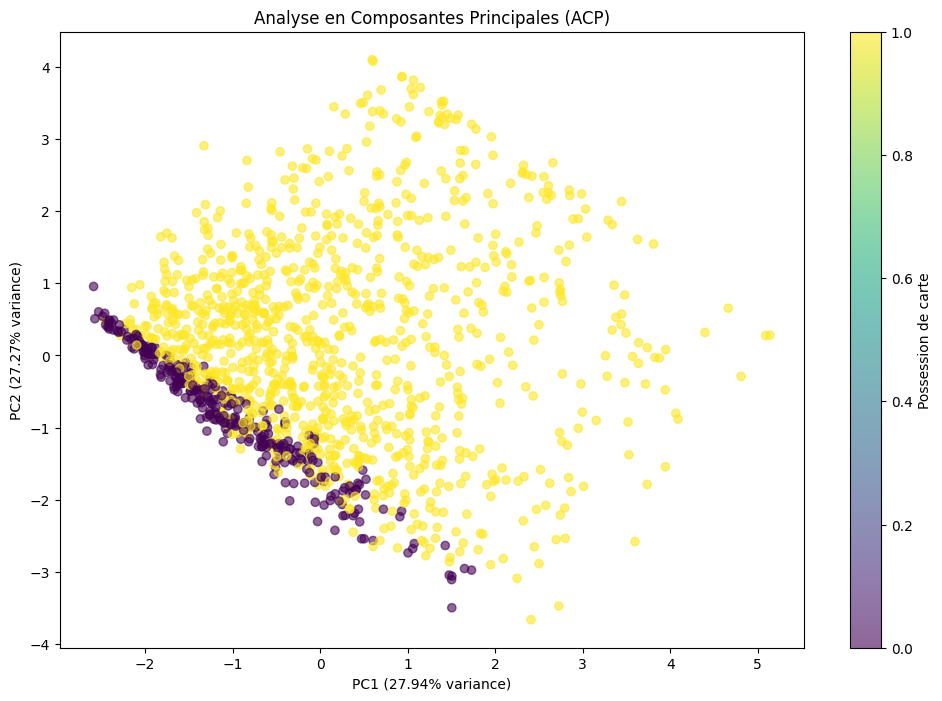

In [20]:
# Analyse des composantes principales (PCA)
numeric_cols = ['age', 'income', 'share', 'expenditure', 'dependents', 'months', 'active']
X = data[numeric_cols].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['card'].map({'yes': 1, 'no': 0}), alpha=0.6)
plt.title('Analyse en Composantes Principales (ACP)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.colorbar(label='Possession de carte')
plt.show()
plt.close()

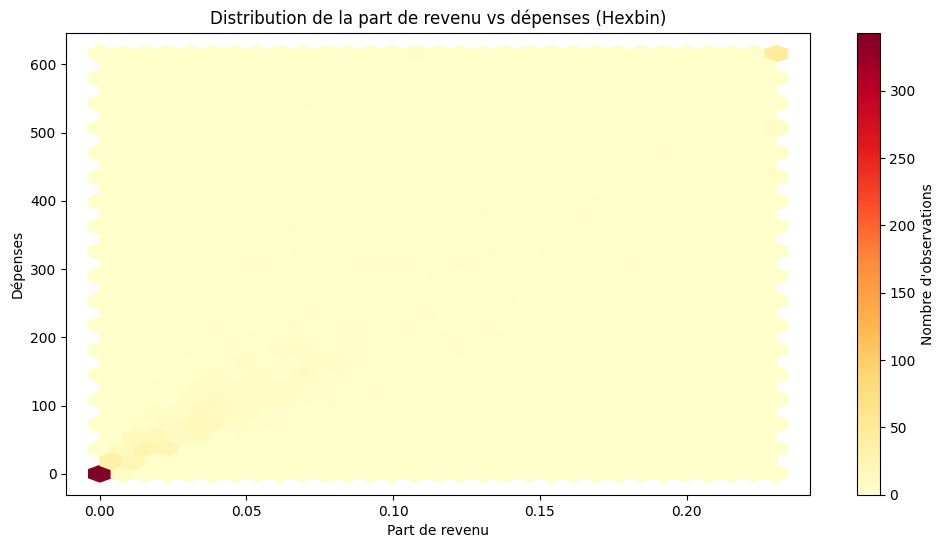

In [21]:
#  Analyse de la part de revenu vs dépenses avec hexbin
plt.figure(figsize=(12, 6))
plt.hexbin(data['share'], data['expenditure'], gridsize=30, cmap='YlOrRd')
plt.colorbar(label='Nombre d\'observations')
plt.title('Distribution de la part de revenu vs dépenses (Hexbin)')
plt.xlabel('Part de revenu')
plt.ylabel('Dépenses')
plt.show()
plt.close()

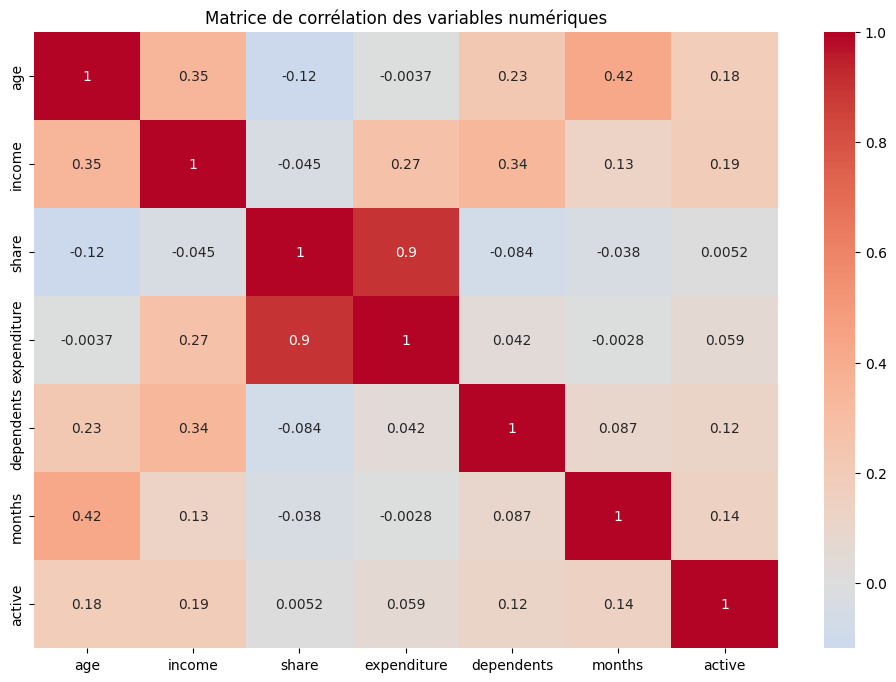

In [22]:
# Matrice de corrélation
plt.figure(figsize=(12, 8))
numeric_cols = ['age', 'income', 'share', 'expenditure', 'dependents', 'months', 'active']
correlation_matrix = data[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation des variables numériques')
plt.show()
plt.close()

In [23]:
# Utilisation du label encoder pour le changement de la colonne sex en 0 et 1
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data.card= le.fit_transform(data.card)
data

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.520000,0.033270,124.983300,yes,no,3,54,1,12.0
1,1,0,33.25000,2.420000,0.005217,9.854167,no,no,3,34,1,13.0
2,1,0,33.66667,4.500000,0.004156,15.000000,yes,no,4,58,1,5.0
3,1,0,30.50000,2.540000,0.065214,137.869200,no,no,0,25,1,7.0
4,1,0,32.16667,6.634375,0.067051,546.503300,yes,no,2,64,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1,0,33.58333,4.566000,0.002146,7.333333,yes,no,0,94,1,19.0
1315,0,0,23.91667,3.192000,0.000376,0.000000,no,no,3,12,1,5.0
1316,1,0,40.58333,4.600000,0.026513,101.298300,yes,no,2,1,1,2.0
1317,1,0,32.83333,3.700000,0.008999,26.996670,no,yes,0,60,1,7.0


In [24]:
# Utilisation du label encoder pour le changement de la colonne sex en 0 et 1
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data.owner= le.fit_transform(data.owner)
data

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.520000,0.033270,124.983300,1,no,3,54,1,12.0
1,1,0,33.25000,2.420000,0.005217,9.854167,0,no,3,34,1,13.0
2,1,0,33.66667,4.500000,0.004156,15.000000,1,no,4,58,1,5.0
3,1,0,30.50000,2.540000,0.065214,137.869200,0,no,0,25,1,7.0
4,1,0,32.16667,6.634375,0.067051,546.503300,1,no,2,64,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1,0,33.58333,4.566000,0.002146,7.333333,1,no,0,94,1,19.0
1315,0,0,23.91667,3.192000,0.000376,0.000000,0,no,3,12,1,5.0
1316,1,0,40.58333,4.600000,0.026513,101.298300,1,no,2,1,1,2.0
1317,1,0,32.83333,3.700000,0.008999,26.996670,0,yes,0,60,1,7.0


In [25]:
# Utilisation du label encoder pour le changement de la colonne sex en 0 et 1
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data.selfemp= le.fit_transform(data.selfemp)
data

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.520000,0.033270,124.983300,1,0,3,54,1,12.0
1,1,0,33.25000,2.420000,0.005217,9.854167,0,0,3,34,1,13.0
2,1,0,33.66667,4.500000,0.004156,15.000000,1,0,4,58,1,5.0
3,1,0,30.50000,2.540000,0.065214,137.869200,0,0,0,25,1,7.0
4,1,0,32.16667,6.634375,0.067051,546.503300,1,0,2,64,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1,0,33.58333,4.566000,0.002146,7.333333,1,0,0,94,1,19.0
1315,0,0,23.91667,3.192000,0.000376,0.000000,0,0,3,12,1,5.0
1316,1,0,40.58333,4.600000,0.026513,101.298300,1,0,2,1,1,2.0
1317,1,0,32.83333,3.700000,0.008999,26.996670,0,1,0,60,1,7.0


In [26]:
data.dtypes

card             int32
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner            int32
selfemp          int32
dependents       int64
months           int64
majorcards       int64
active         float64
dtype: object

In [27]:
#data = data.drop(columns={"share"})

In [28]:
# Selection des colonnes de variables indépendantes et la variable dépendante
y = data["expenditure"]
X = data.drop(['expenditure'], axis=1)


In [29]:

# Division des données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Normalisation des données
# StandardScaler pour les features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# MinMaxScaler pour la target variable (expenditure)
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [32]:
# Définition des modèles et leurs paramètres
models = {
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, 30, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.8, 0.9, 1.0]
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['rbf', 'linear'],
            'gamma': ['scale', 'auto', 0.1, 0.01]
        }
    }
}

In [33]:
def evaluate_regression_model(y_true, y_pred, model_name):
    """Évaluation complète d'un modèle de régression"""
    # Métriques
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\nRésultats pour {model_name}:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    
    return {'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2}

In [34]:
def perform_grid_search():
    results = {}
    
    for name, model_info in models.items():
        print(f"\nEntraînement du modèle {name}...")
        
        # GridSearchCV
        grid_search = GridSearchCV(
            estimator=model_info['model'],
            param_grid=model_info['params'],
            cv=5,
            scoring='neg_mean_squared_error',
            n_jobs=-1,
            verbose=1
        )
        
        # Entraînement
        grid_search.fit(X_train_scaled, y_train_scaled)
        
        # Meilleurs paramètres
        print(f"\nMeilleurs paramètres pour {name}:")
        print(grid_search.best_params_)
        
        # Prédictions
        y_pred_scaled = grid_search.predict(X_test_scaled)
        
        # Conversion des prédictions à l'échelle originale
        y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
        
        # Évaluation
        metrics = evaluate_regression_model(y_test, y_pred, name)
        
        # Stockage des résultats
        results[name] = {
            'best_params': grid_search.best_params_,
            'metrics': metrics,
            'best_model': grid_search.best_estimator_,
            'predictions': y_pred
        }
    
    return results

# Exécution de GridSearchCV
print("Début de l'entraînement des modèles...")
results = perform_grid_search()

Début de l'entraînement des modèles...

Entraînement du modèle Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Meilleurs paramètres pour Random Forest:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Résultats pour Random Forest:
MSE: 1443.4338
RMSE: 37.9925
MAE: 10.7139
R²: 0.9556

Entraînement du modèle XGBoost...
Fitting 5 folds for each of 81 candidates, totalling 405 fits

Meilleurs paramètres pour XGBoost:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.9}

Résultats pour XGBoost:
MSE: 1234.8390
RMSE: 35.1403
MAE: 10.1793
R²: 0.9620

Entraînement du modèle SVR...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Meilleurs paramètres pour SVR:
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

Résultats pour SVR:
MSE: 2689.6520
RMSE: 51.8619
MAE: 35.3492
R²: 0.9173


In [35]:
# Visualisation des résultats
def plot_regression_results(results):
    # Préparation des données pour le graphique
    metrics = ['rmse', 'mae', 'r2']
    models = list(results.keys())
    
    # Création du graphique
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    for i, metric in enumerate(metrics):
        values = [results[model]['metrics'][metric] for model in models]
        if metric == 'r2':  # R² doit être sur une échelle de 0 à 1
            axes[i].set_ylim(0, 1)
        sns.barplot(x=models, y=values, ax=axes[i])
        axes[i].set_title(f'{metric.upper()}')
        axes[i].set_xticklabels(models, rotation=45)
        
        # Ajout des valeurs sur les barres
        for j, v in enumerate(values):
            axes[i].text(j, v, f'{v:.3f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    plt.close()

C:\Users\ngoue\AppData\Local\Temp\ipykernel_26972\1783005023.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(models, rotation=45)
C:\Users\ngoue\AppData\Local\Temp\ipykernel_26972\1783005023.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(models, rotation=45)
C:\Users\ngoue\AppData\Local\Temp\ipykernel_26972\1783005023.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(models, rotation=45)


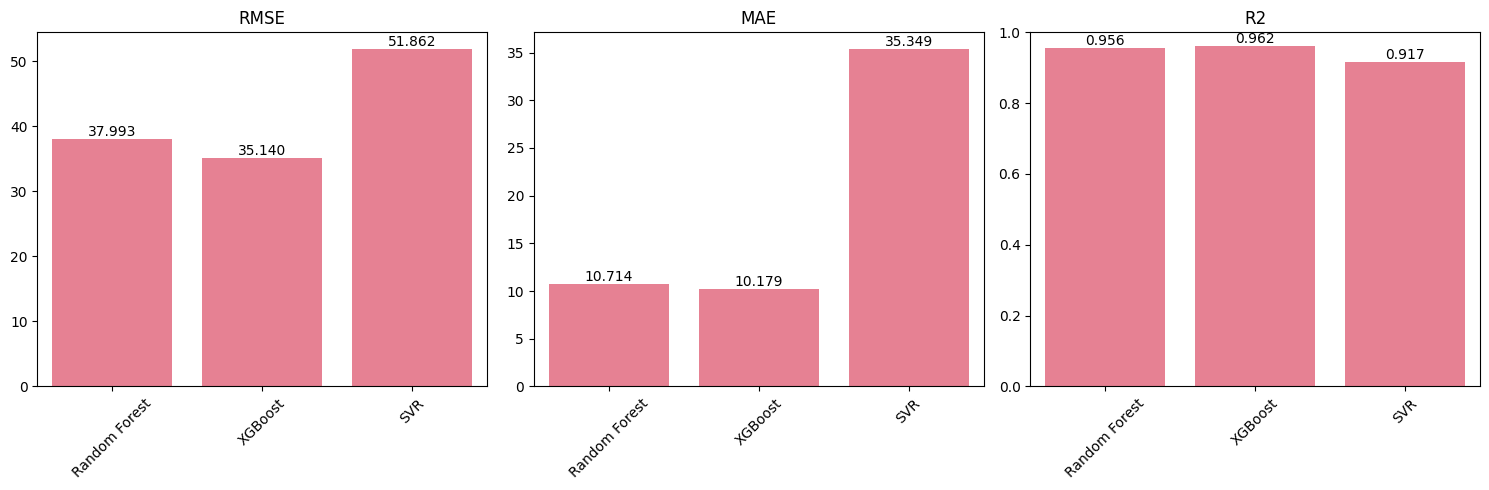

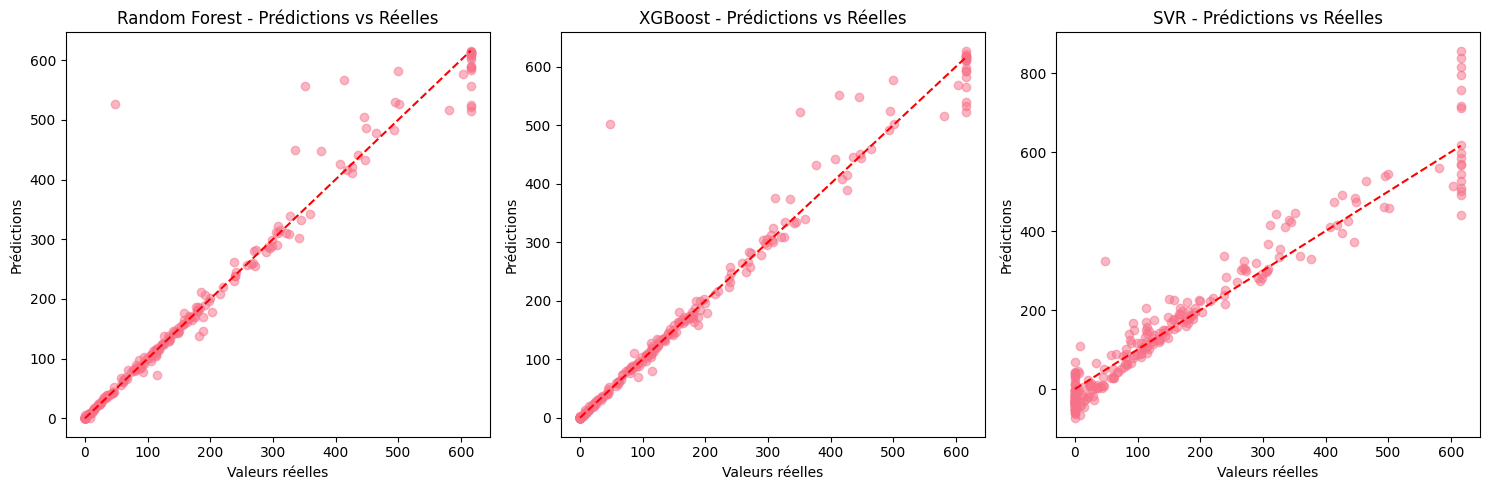

In [36]:
# Visualisation des prédictions vs valeurs réelles
def plot_predictions_vs_actual(results):
    plt.figure(figsize=(15, 5))
    
    for i, (name, result) in enumerate(results.items(), 1):
        plt.subplot(1, 3, i)
        plt.scatter(y_test, result['predictions'], alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.title(f'{name} - Prédictions vs Réelles')
        plt.xlabel('Valeurs réelles')
        plt.ylabel('Prédictions')
    
    plt.tight_layout()
    plt.show()
    plt.close()

# Affichage des résultats
plot_regression_results(results)
plot_predictions_vs_actual(results)

In [37]:
# Sauvegarde du meilleur modèle
import pickle
best_model_name = max(results, key=lambda x: results[x]['metrics']['r2'])
best_model = results[best_model_name]['best_model']

# Création du dossier models s'il n'existe pas
import os
if not os.path.exists('models'):
    os.makedirs('models')

with open('models/best_regression_model.pkl', 'wb') as f:
    pickle.dump({
        'model': best_model,
        'scaler_X': scaler_X,
        'scaler_y': scaler_y,
        'metrics': results[best_model_name]['metrics']  # Ajout des métriques !
    }, f)

print(f"\nMeilleur modèle: {best_model_name}")
print(f"R²: {results[best_model_name]['metrics']['r2']:.4f}")
print("Modèle et scalers sauvegardés avec succès!") 


Meilleur modèle: XGBoost
R²: 0.9620
Modèle et scalers sauvegardés avec succès!



Évaluation sur l'ensemble du dataset complet :

Résultats pour XGBoost (full data):
MSE: 260.1206
RMSE: 16.1283
MAE: 3.8789
R²: 0.9922


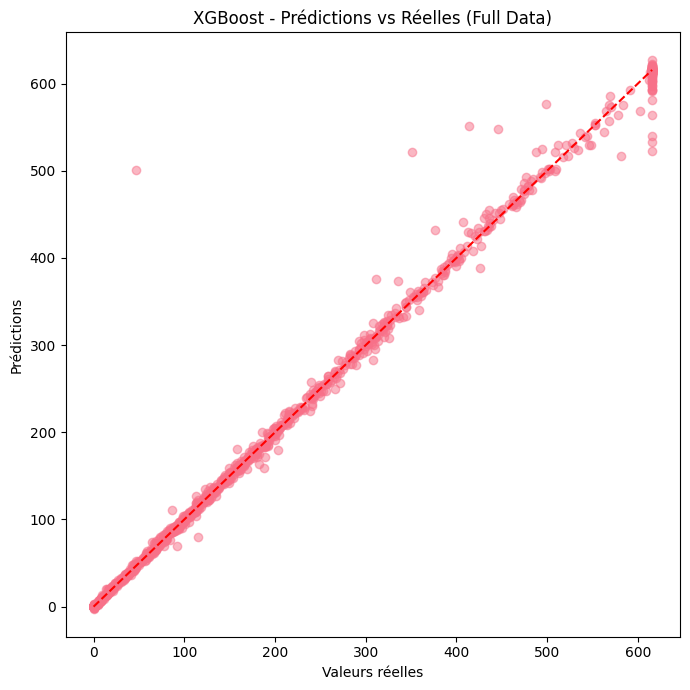

In [38]:
X_scaled_full = scaler_X.transform(X)  # On utilise le scaler déjà entraîné
y_pred_scaled_full = best_model.predict(X_scaled_full)
y_pred_full = scaler_y.inverse_transform(y_pred_scaled_full.reshape(-1, 1)).ravel()

# Évaluation globale sur tout le dataset
print("\nÉvaluation sur l'ensemble du dataset complet :")
evaluate_regression_model(y, y_pred_full, f"{best_model_name} (full data)")

# Visualisation : Prédictions vs Réel sur tout le dataset
plt.figure(figsize=(7, 7))
plt.scatter(y, y_pred_full, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title(f'{best_model_name} - Prédictions vs Réelles (Full Data)')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.tight_layout()
plt.show()
plt.close()